In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs
import hickle as hkl # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands

import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../Analysis_PSI_EPFL/Runs_22-08-20_J1Plot/MediumKJ1_Corr_L4_folder/'
results_foldername = '22-08-2020/'
os.makedirs('./' + foldername + results_foldername, exist_ok = True)

filenamelist = ['backup']
n = len(filenamelist)

In [4]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist)

s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt)

n = len(L)
failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)])

kw = {'binning': True, 'plzplot': False, 'plotmin': 0, 'plotmax': 16}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[t_h_MeanM, t_h_MeanMsq, t_h_varMeanM, t_h_varMeanMsq, Chi, ErrChi] = \
 af.LoadMagnetisation(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

nb  [128] num_in_bin  [64]
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
[-0.66666667]
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]


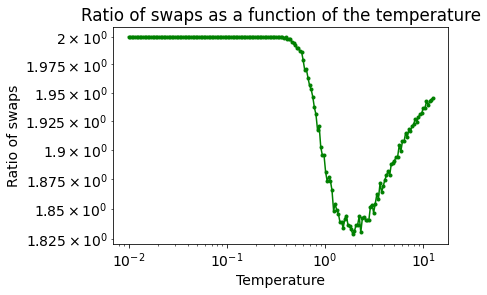

In [5]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

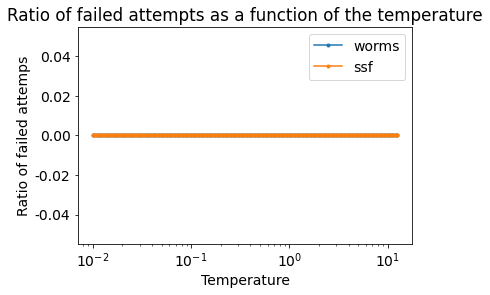

In [6]:
af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername,failed, failedssf)

Verifying that the low temperatures of file  backup correspond to the ground state.
Phase 1:  True
Phase 2:  True
Phase 3:  True
Phase 4:  True
Phase 5:  True
Phase 6:  False
Phase 7:  False
Phase 8:  False
Phase 9:  False
Phase 10:  False
Phase 11:  False


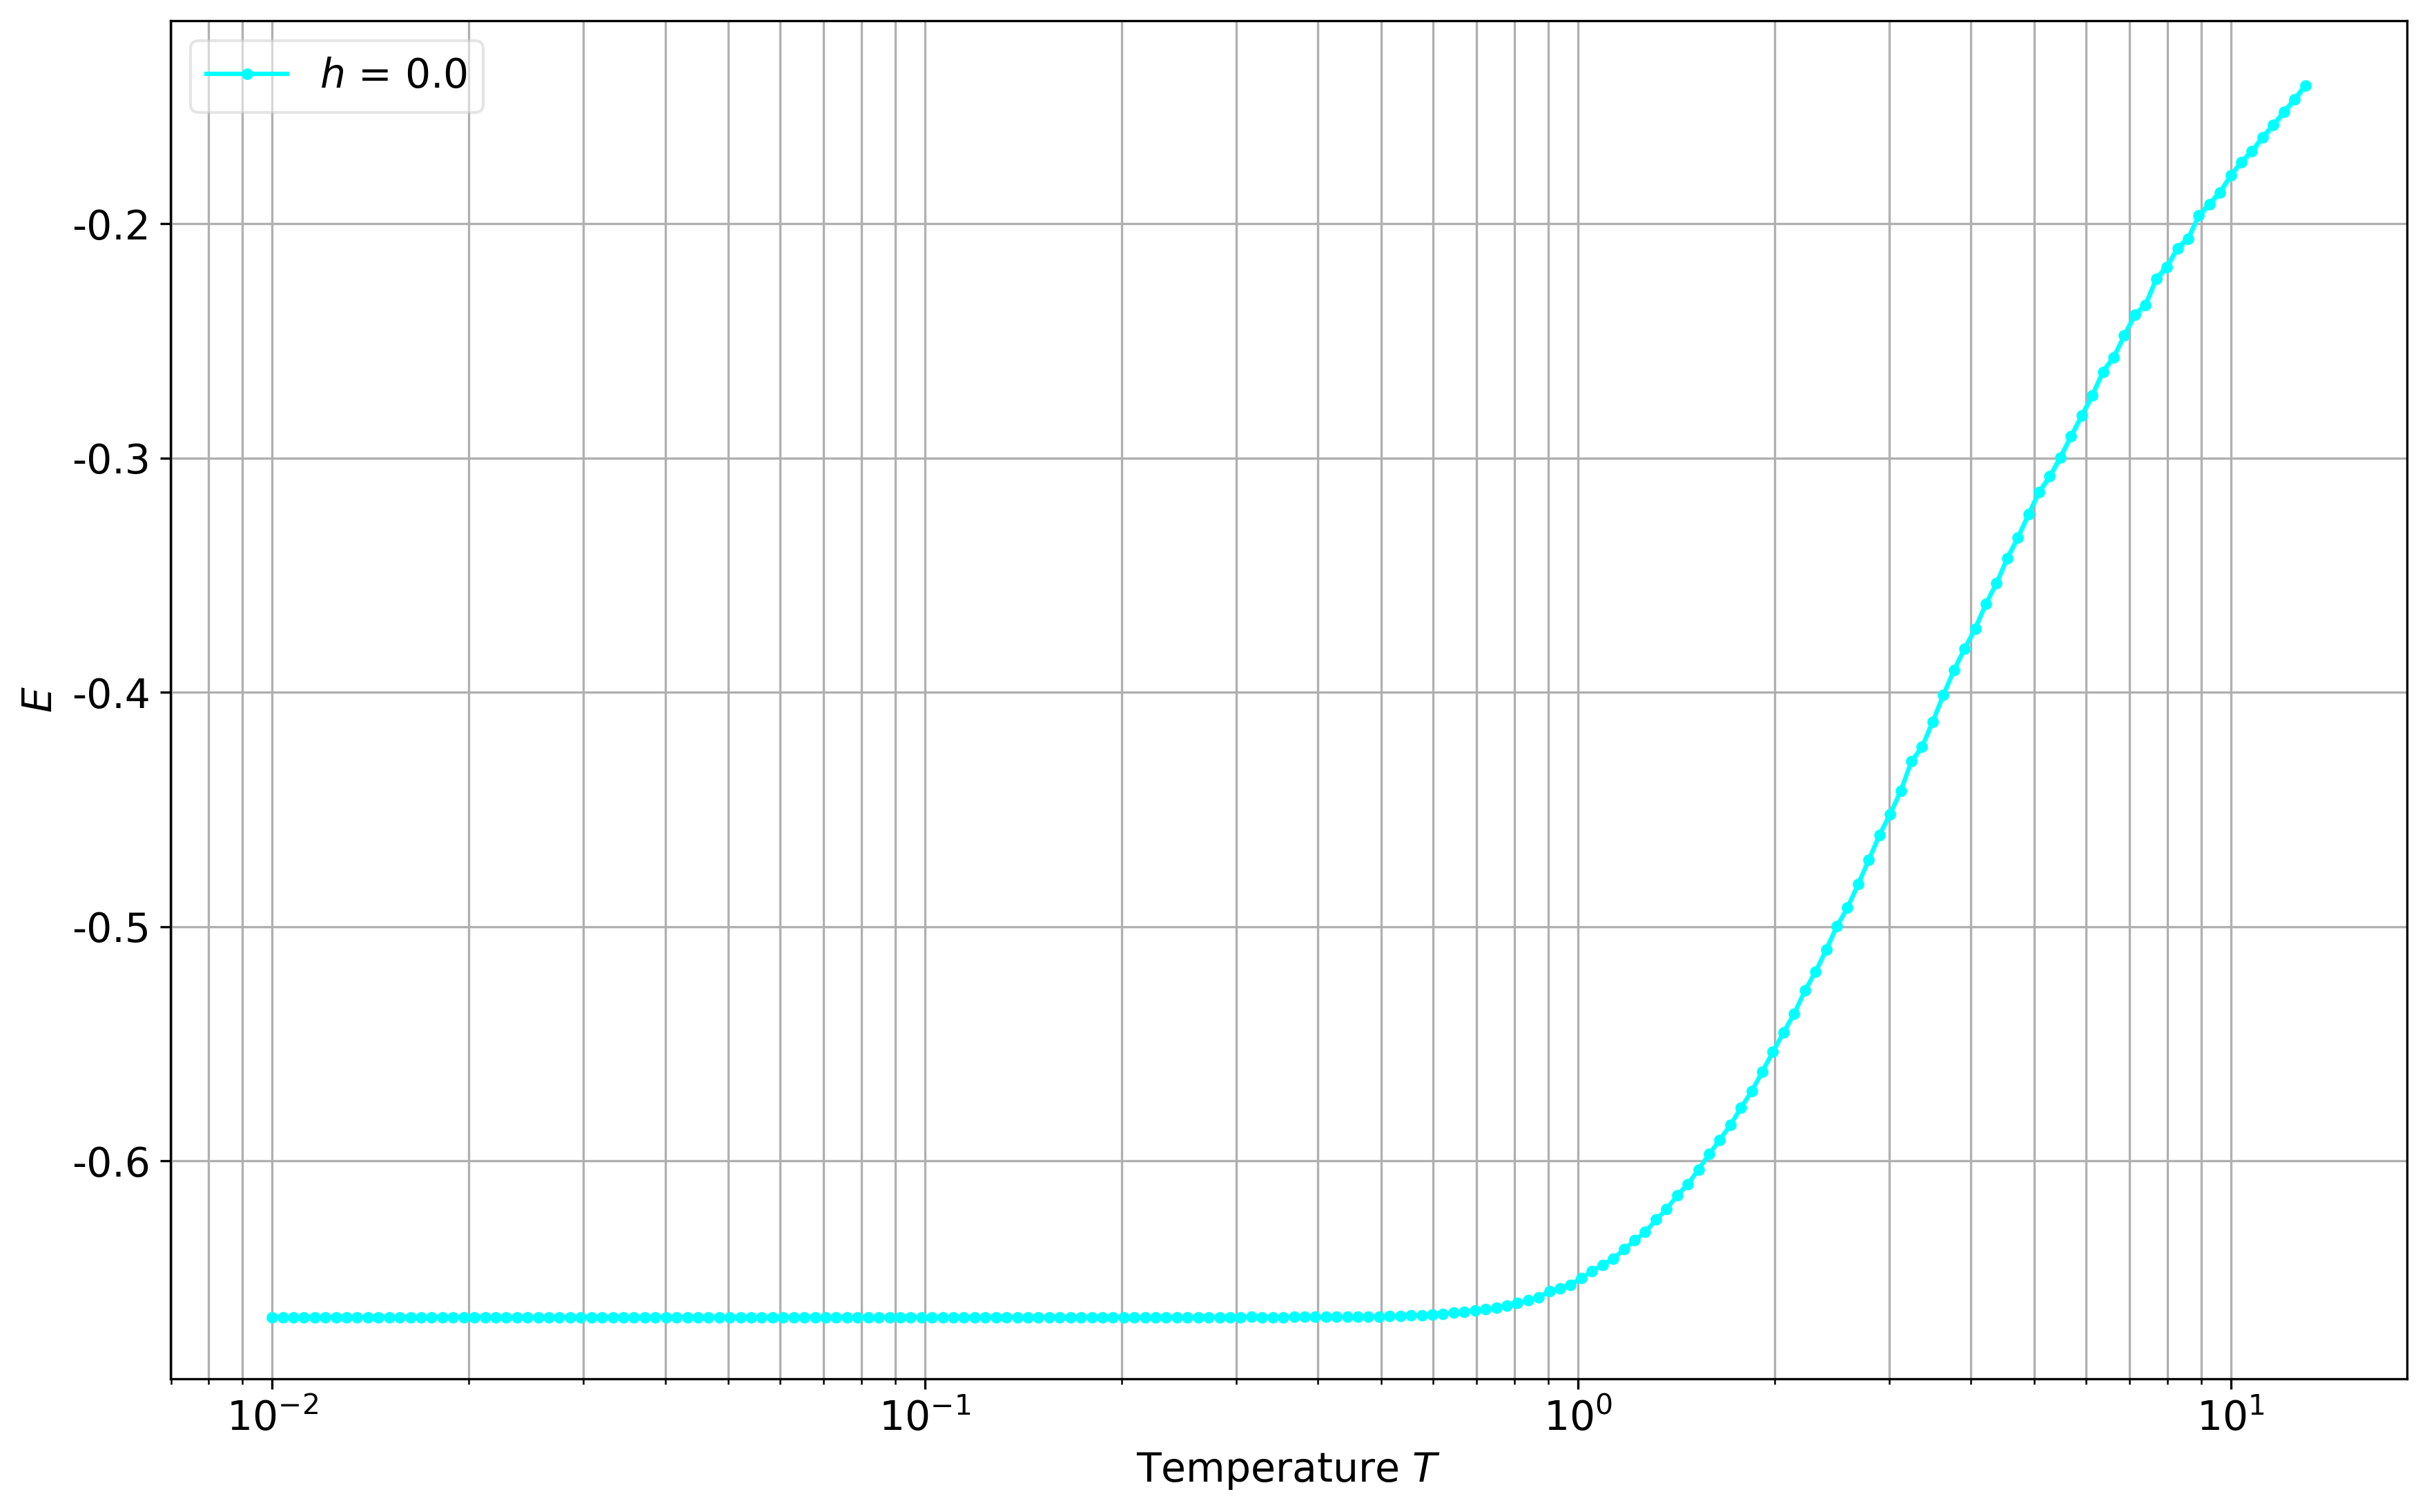

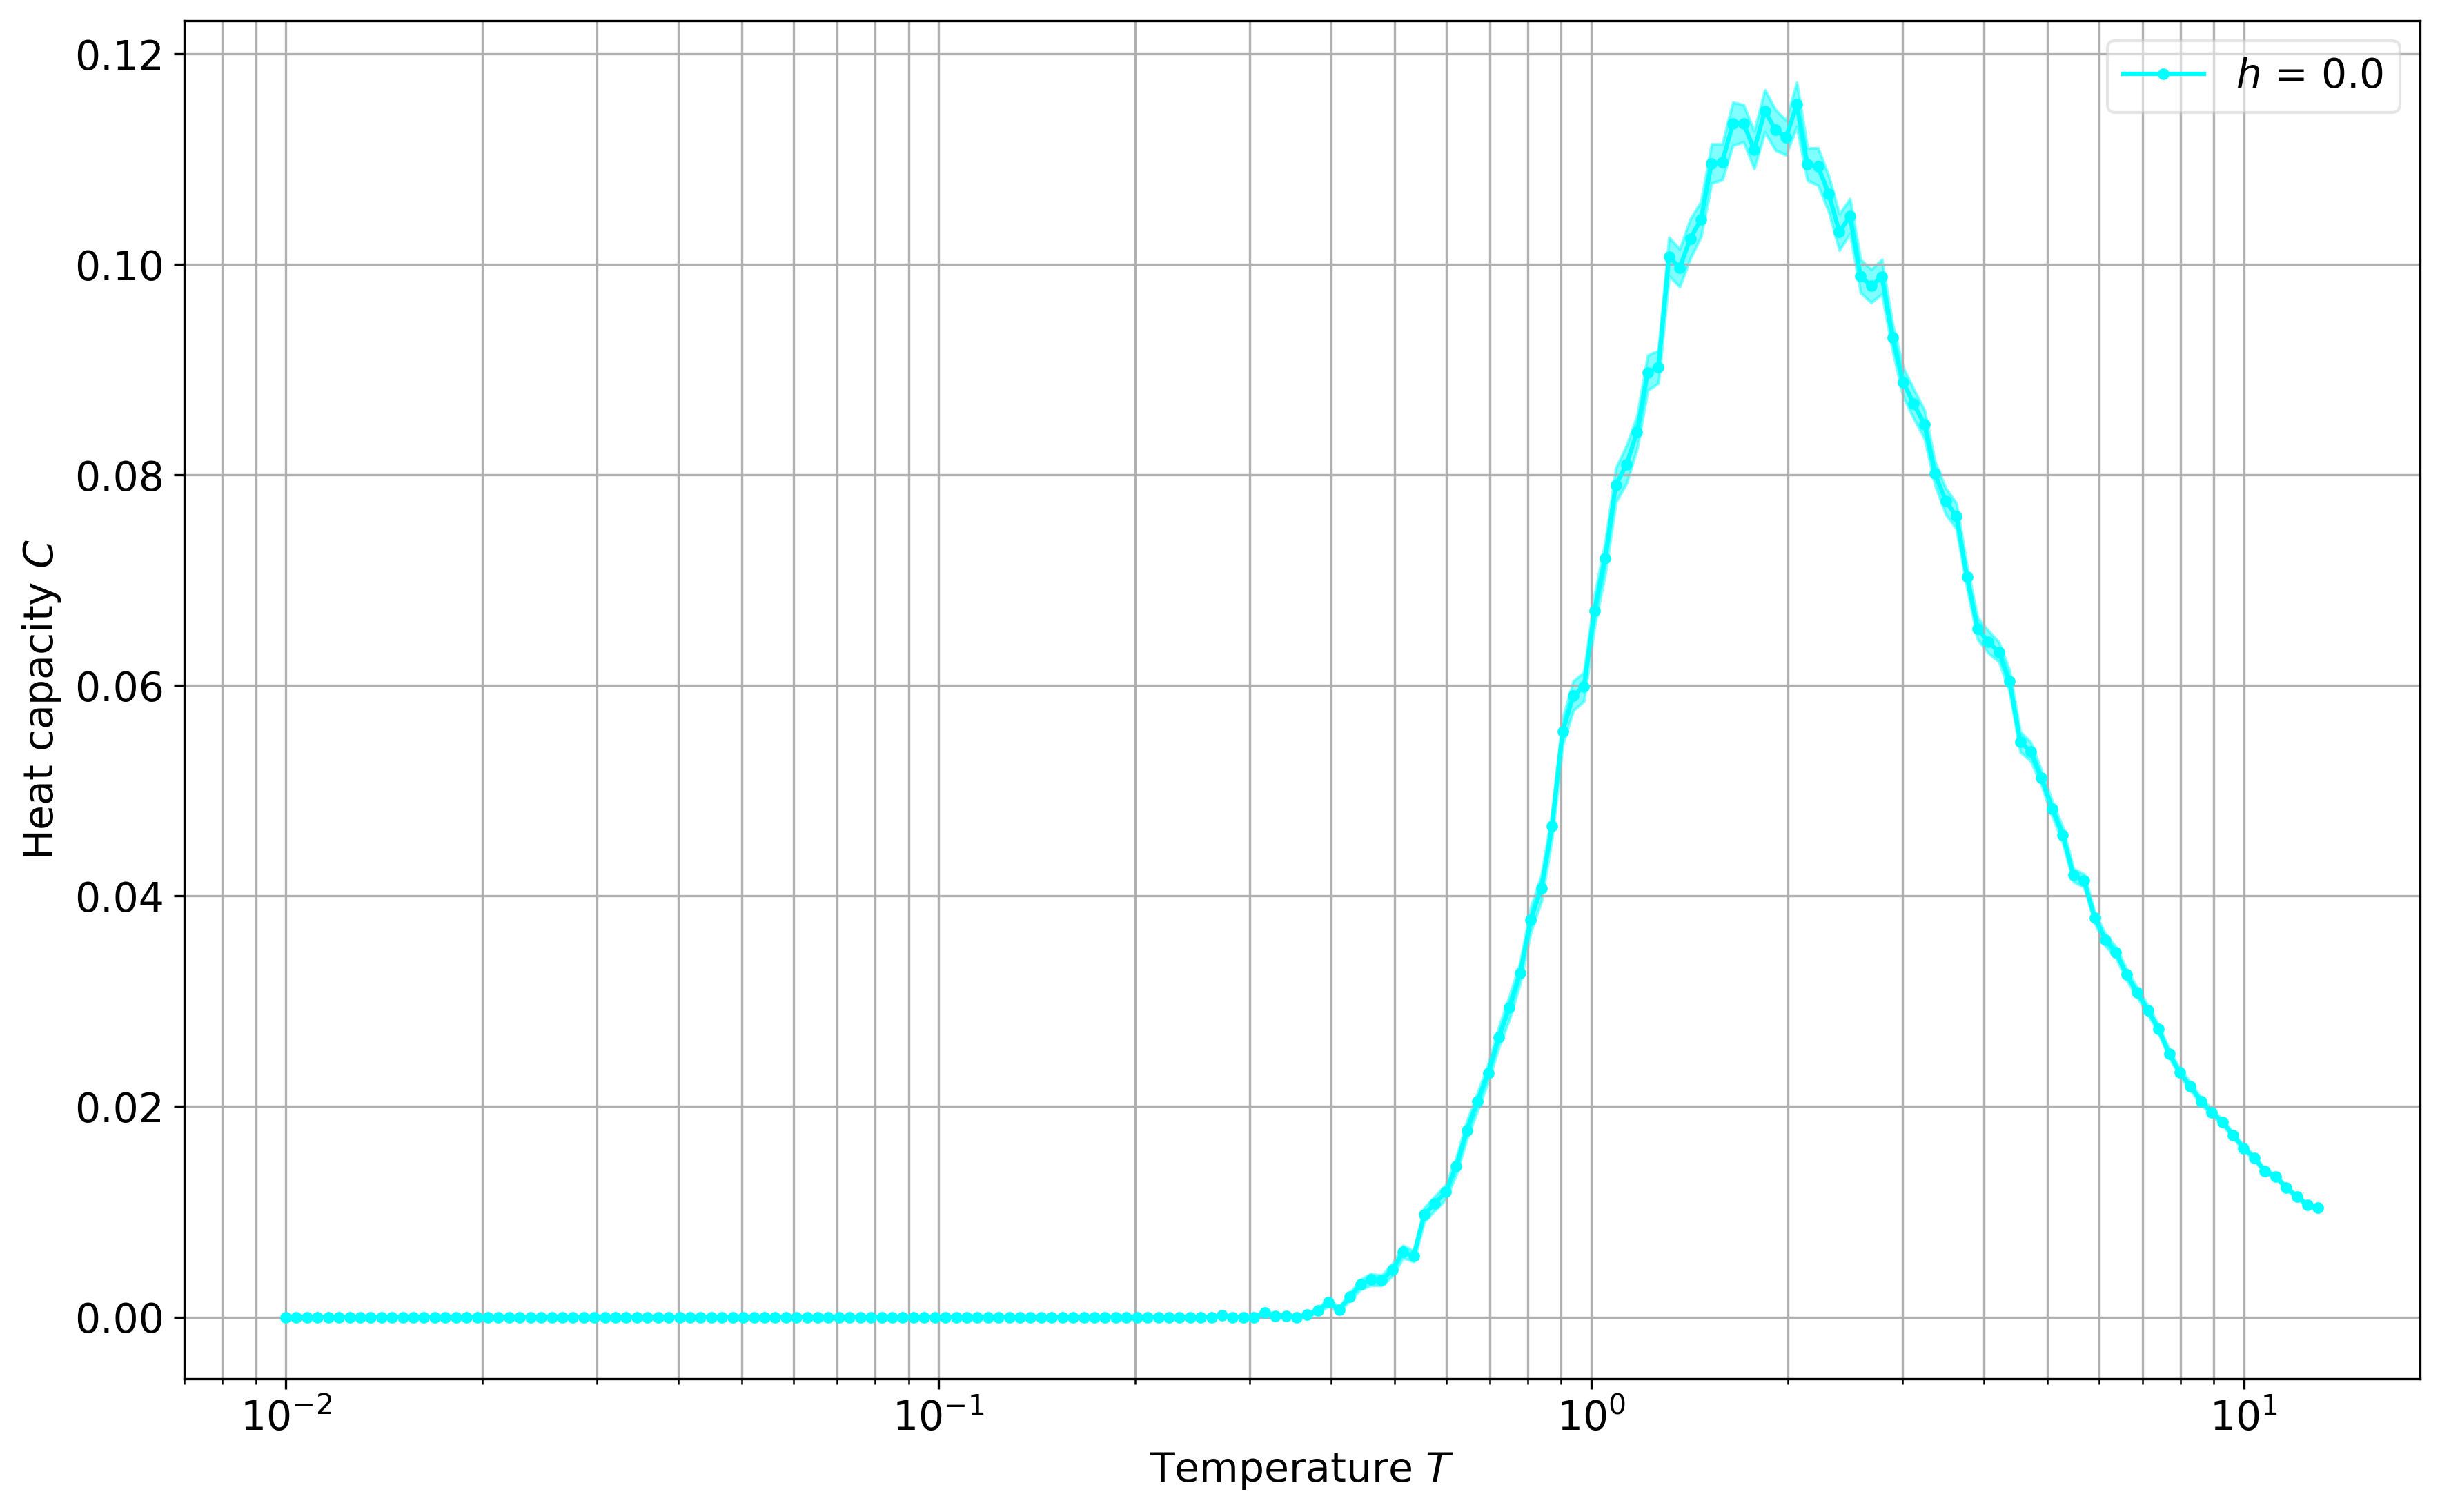

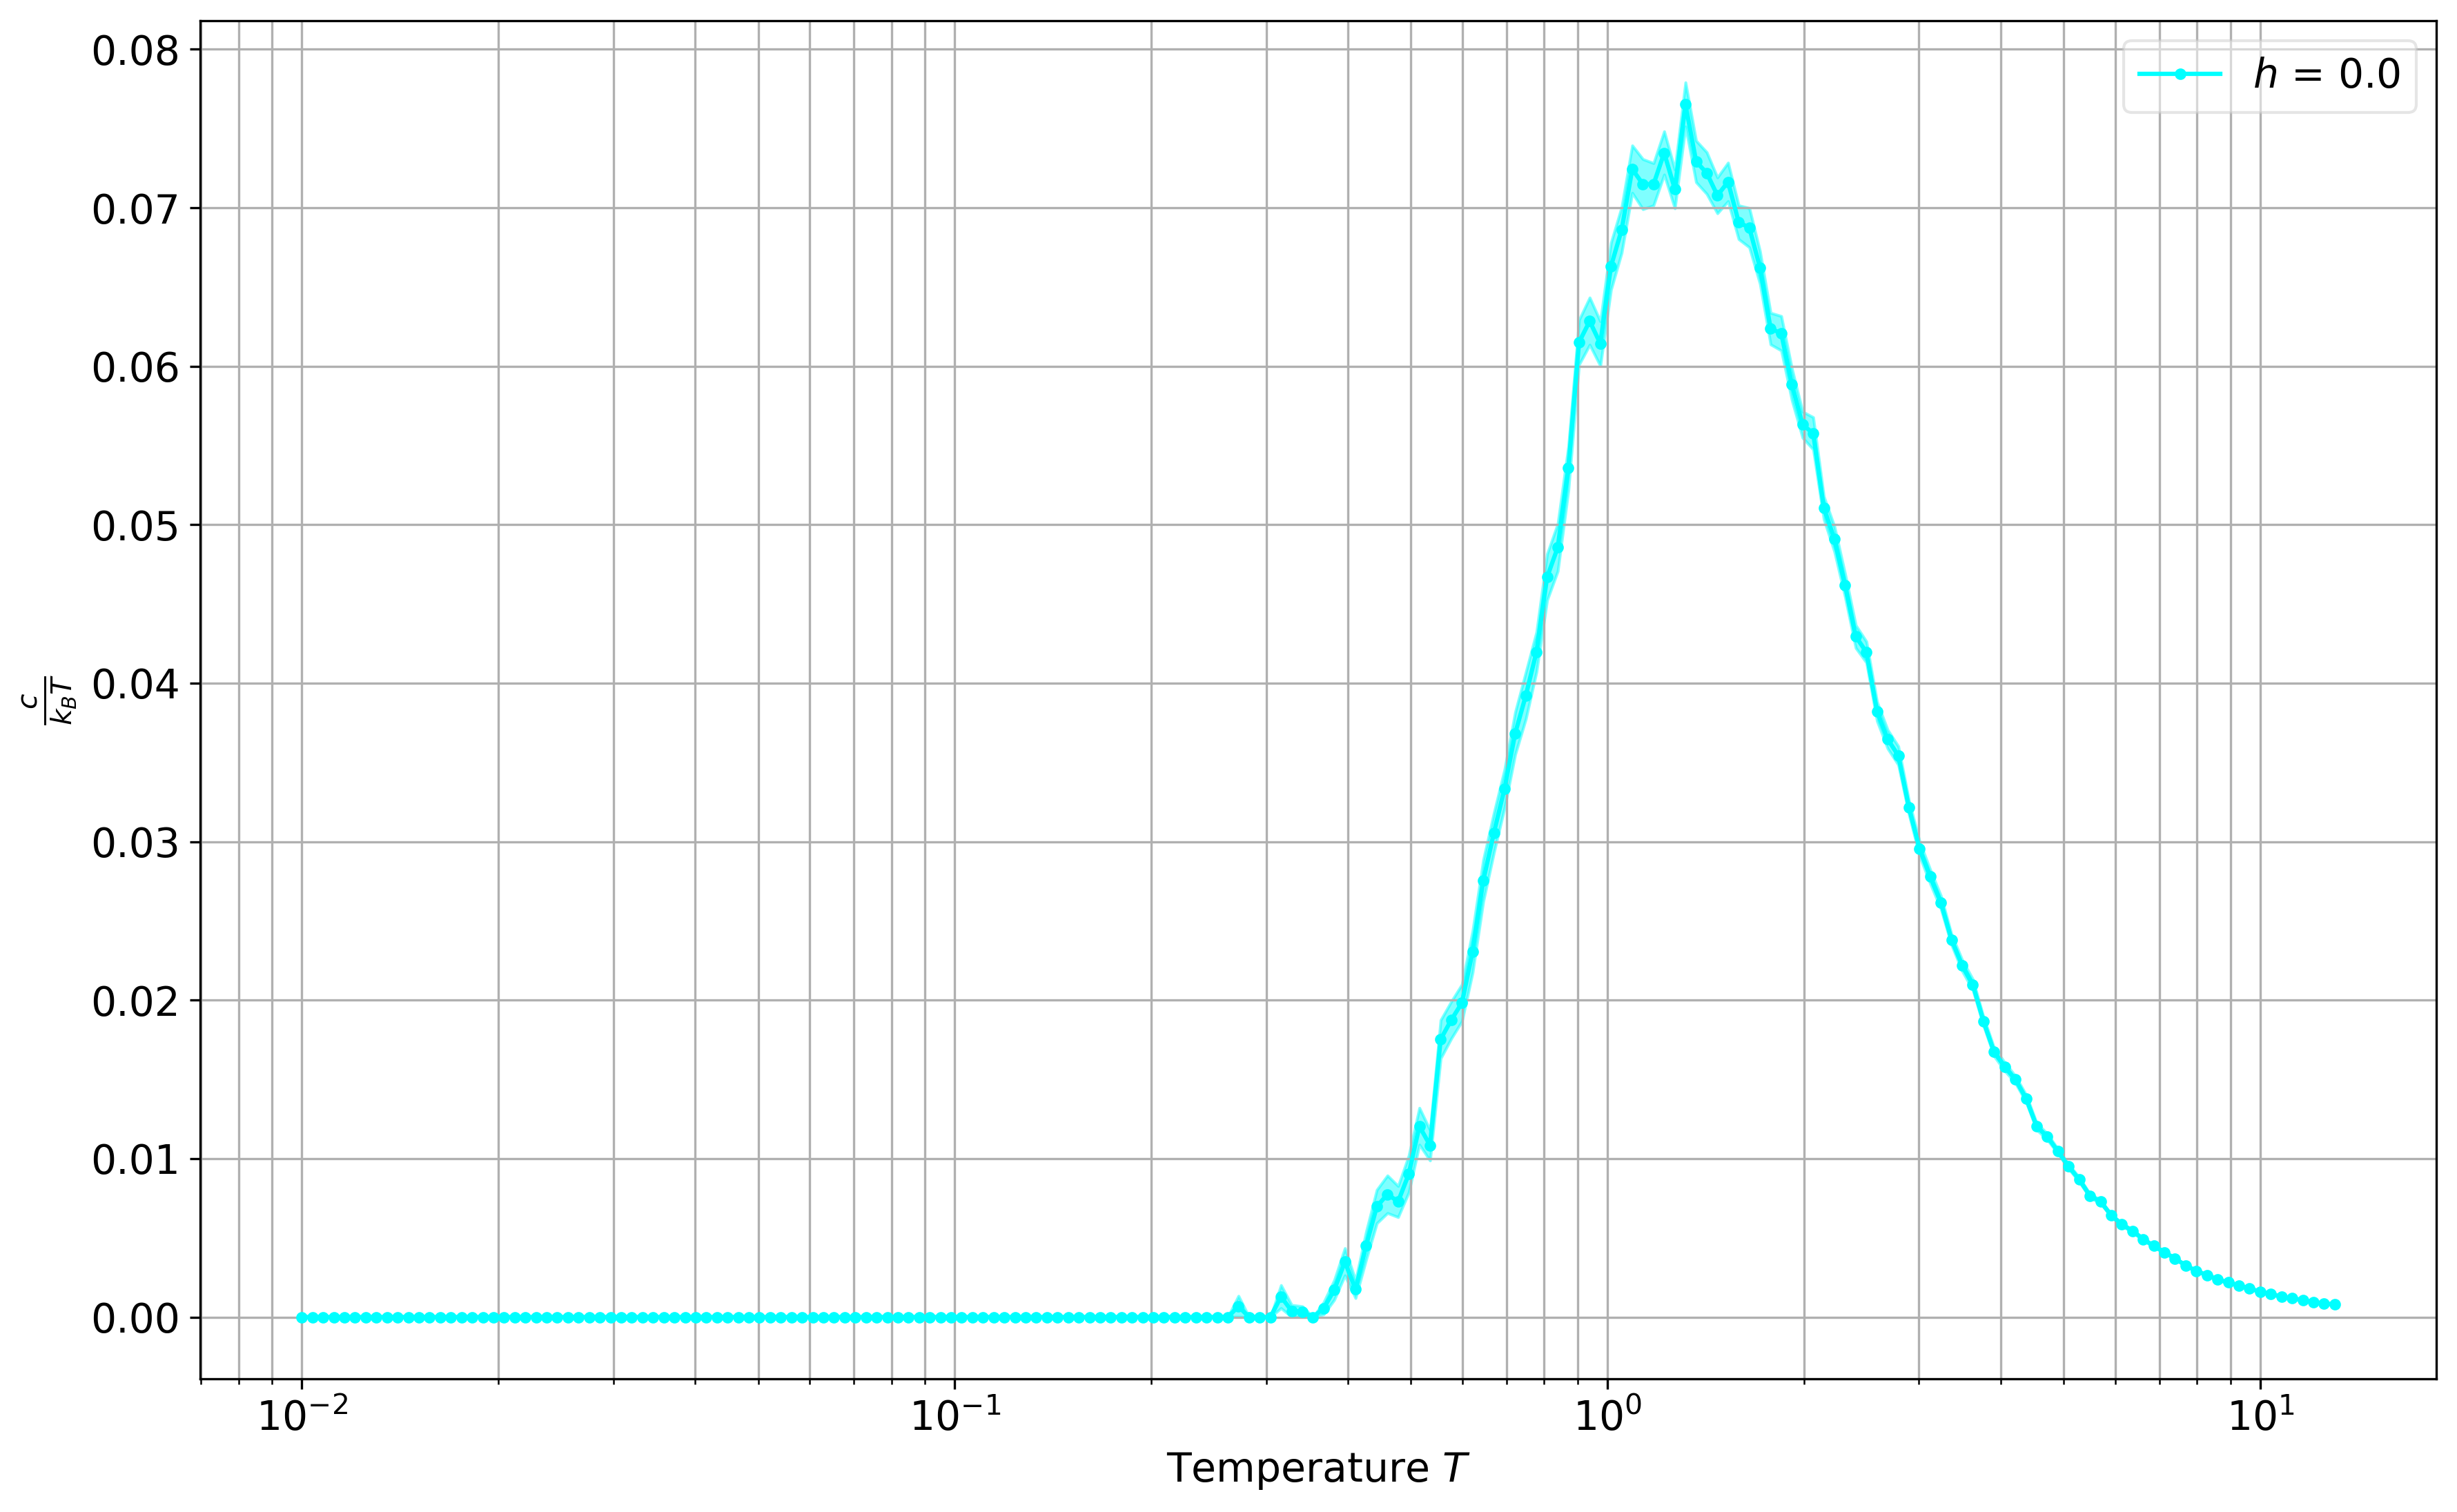

In [7]:
############################################
#        ## Energy ANALYSIS ##
############################################
### Energy
S0 = np.log(2)
kw = {'gscheck': True}
af.BasicPlotsE(L, n, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
plt.show()

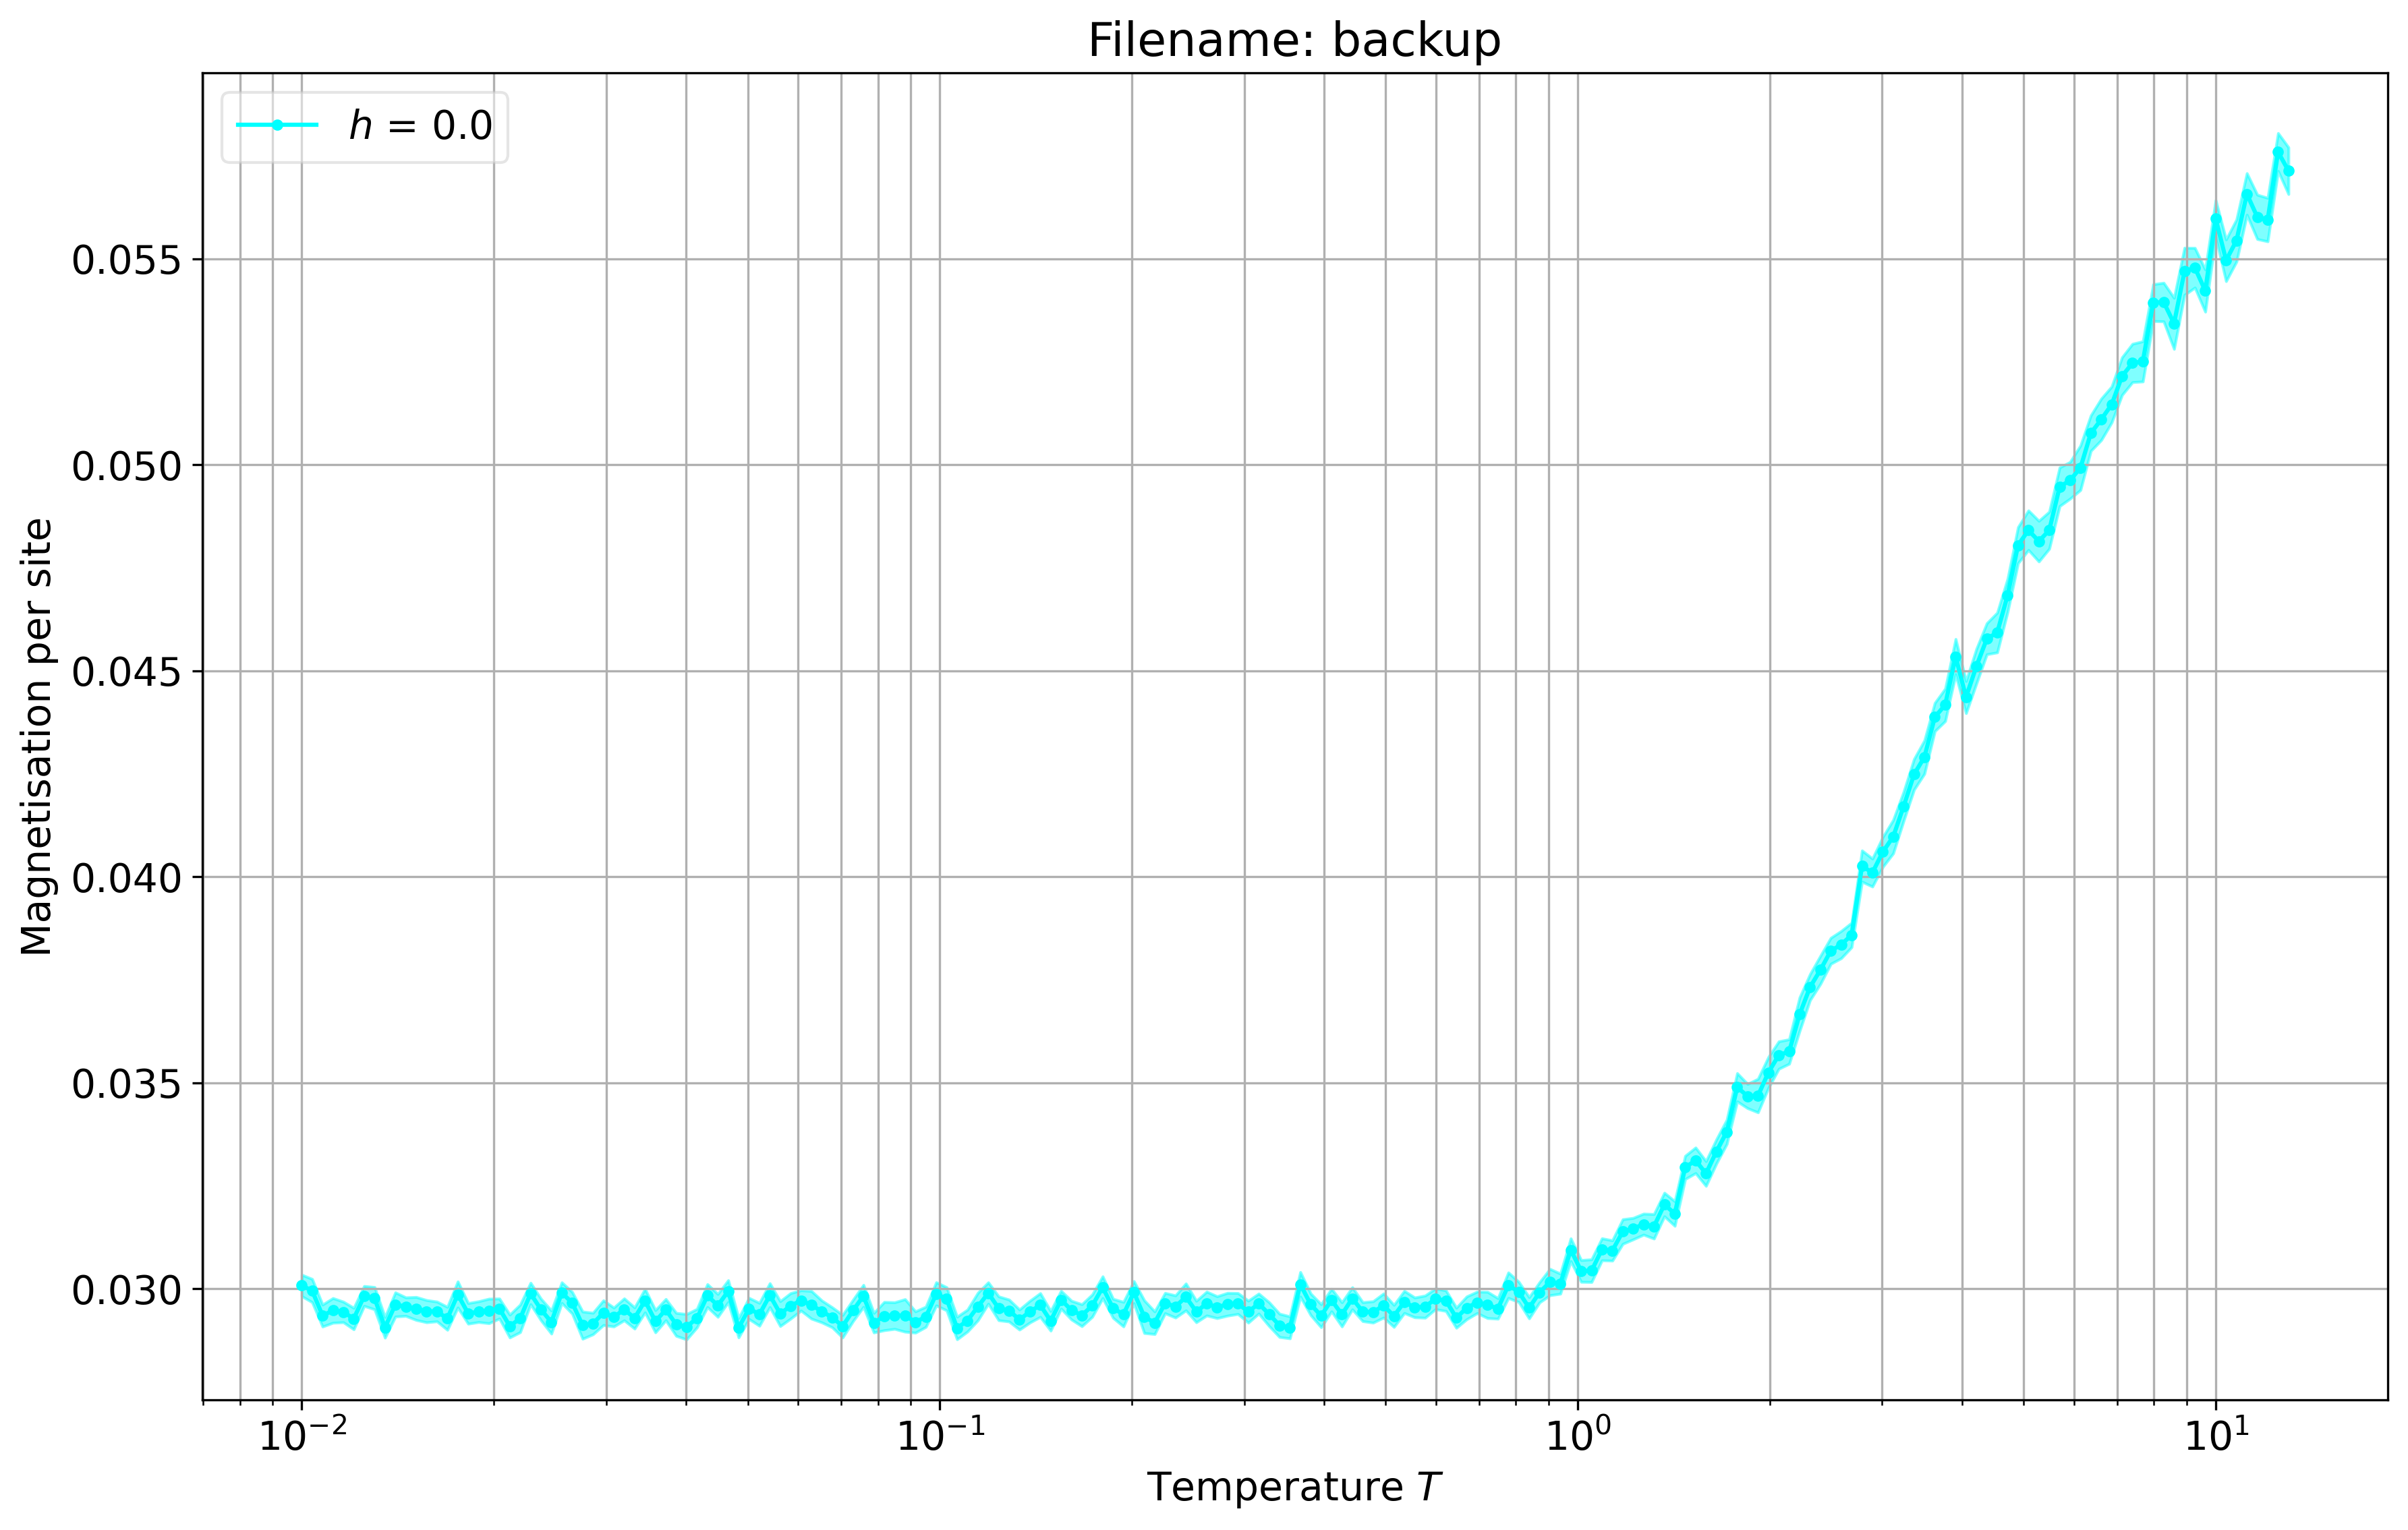

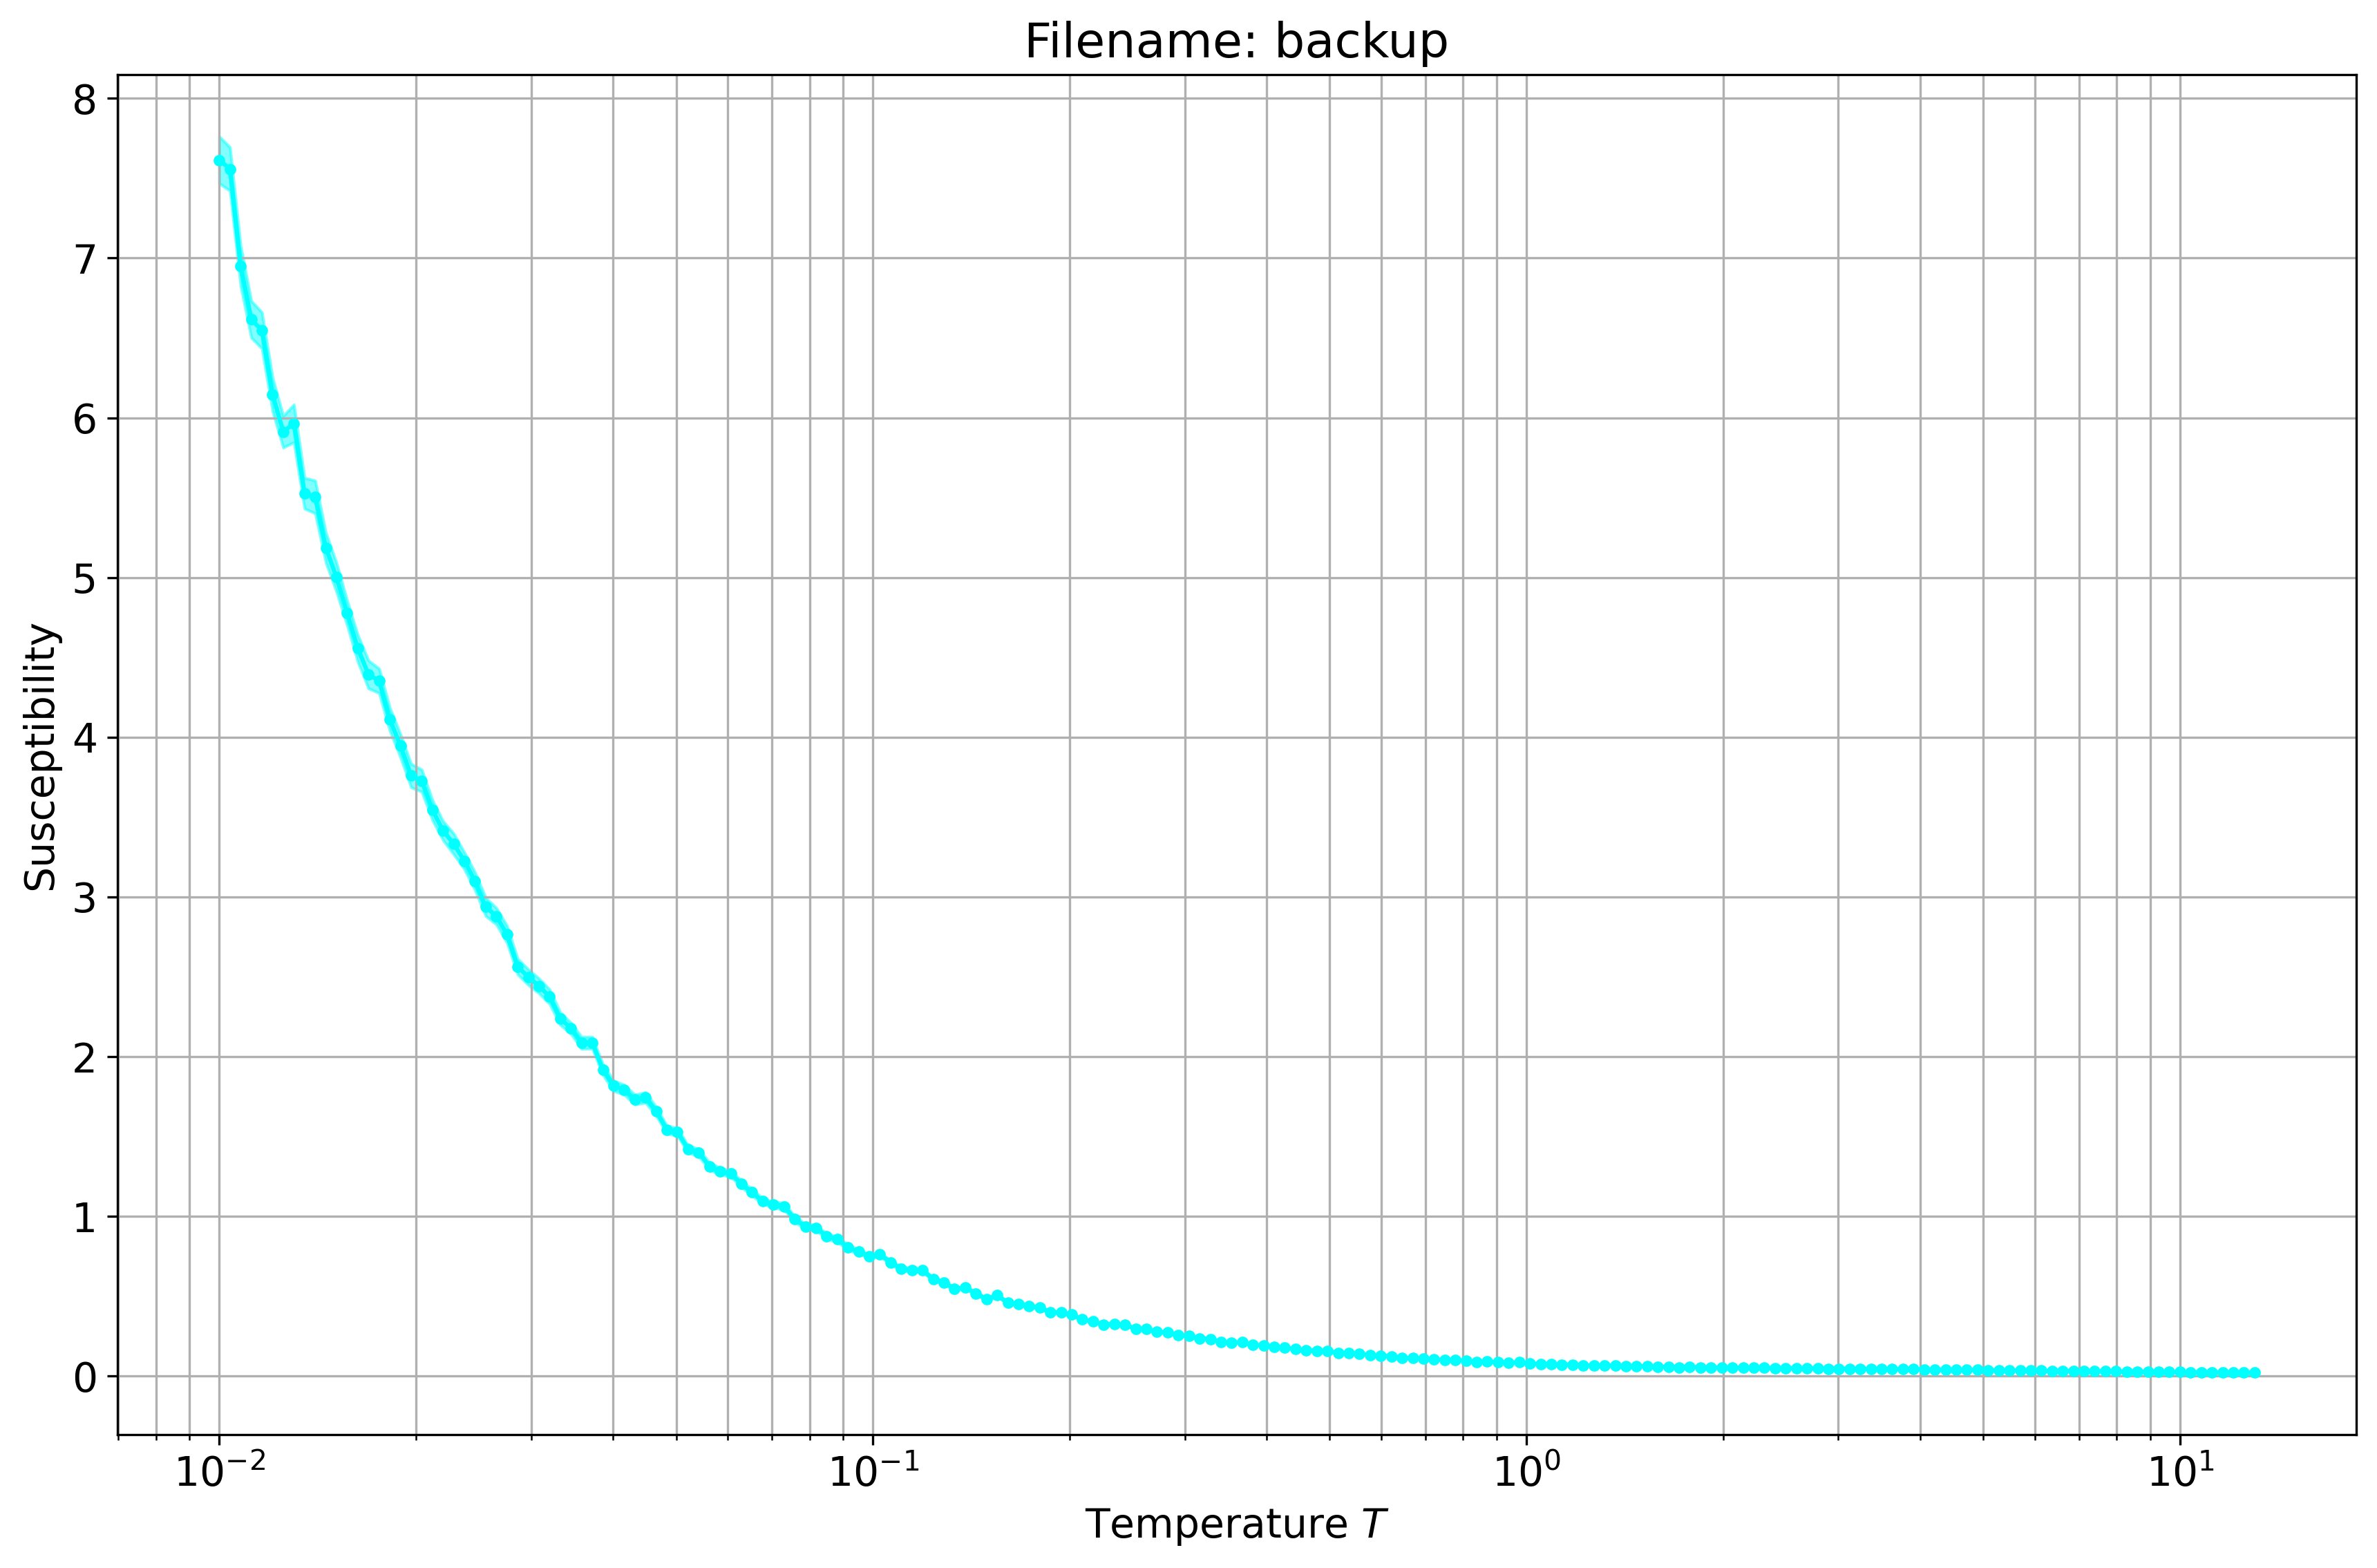

In [8]:
## #        ## MAGNETISATION ANALYSIS ##
###########################################
af.BasicPlotsM(L, n, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                results_foldername, filenamelist, t_h_MeanM, t_h_MeanMsq, t_h_varMeanM,
                t_h_varMeanMsq, Chi, ErrChi, J1, J2, J3, J4, **kw)
plt.show()

In [9]:
rmmag = True
kw = {'rmmag':rmmag,'binning': True, 'plzplot':False}

t_h_MeanFc, t_h_varMeanFc, t_h_MeanSi, t_h_varMeanSi= \
 af.LoadFirstCorrelations(foldername, filenamelist, listfunctions,stat_temps,
                          stat_hfields, nb,t_h_varMeanMsq, **kw)

Binning...Si
 bins list for binning:  [128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [128, 64, 32, 16]
[7.39557099e-33 8.27714854e-07 6.29101692e-07 1.15581501e-06]
(192, 1, 4)
(192, 1, 144)


In [11]:
## Exact solution data:
NNdata = np.loadtxt(foldername + "ExactSolutionGraph_MorePreciseScan_ShearApplied_NN.dat")
NN2data = np.loadtxt(foldername + "ExactSolutionGraph_NN2.dat")
NN3pdata = np.loadtxt(foldername + "ExactSolutionGraph_NN3par.dat")
NN3sdata = np.loadtxt(foldername + "ExactSolutionGraph_NN3star.dat")

## correct for the x-axis scale (cf Fig. 4 in Barry, Khatun, Int. J. Mod. Phy. B 11, 1997)
NNdata[:,0] = NNdata[:,0]
NN2data[:,0] = 4*NN2data[:,0]
NN3pdata[:,0] = 4*NN3pdata[:,0]
NN3sdata[:,0] = 4*NN3sdata[:,0]

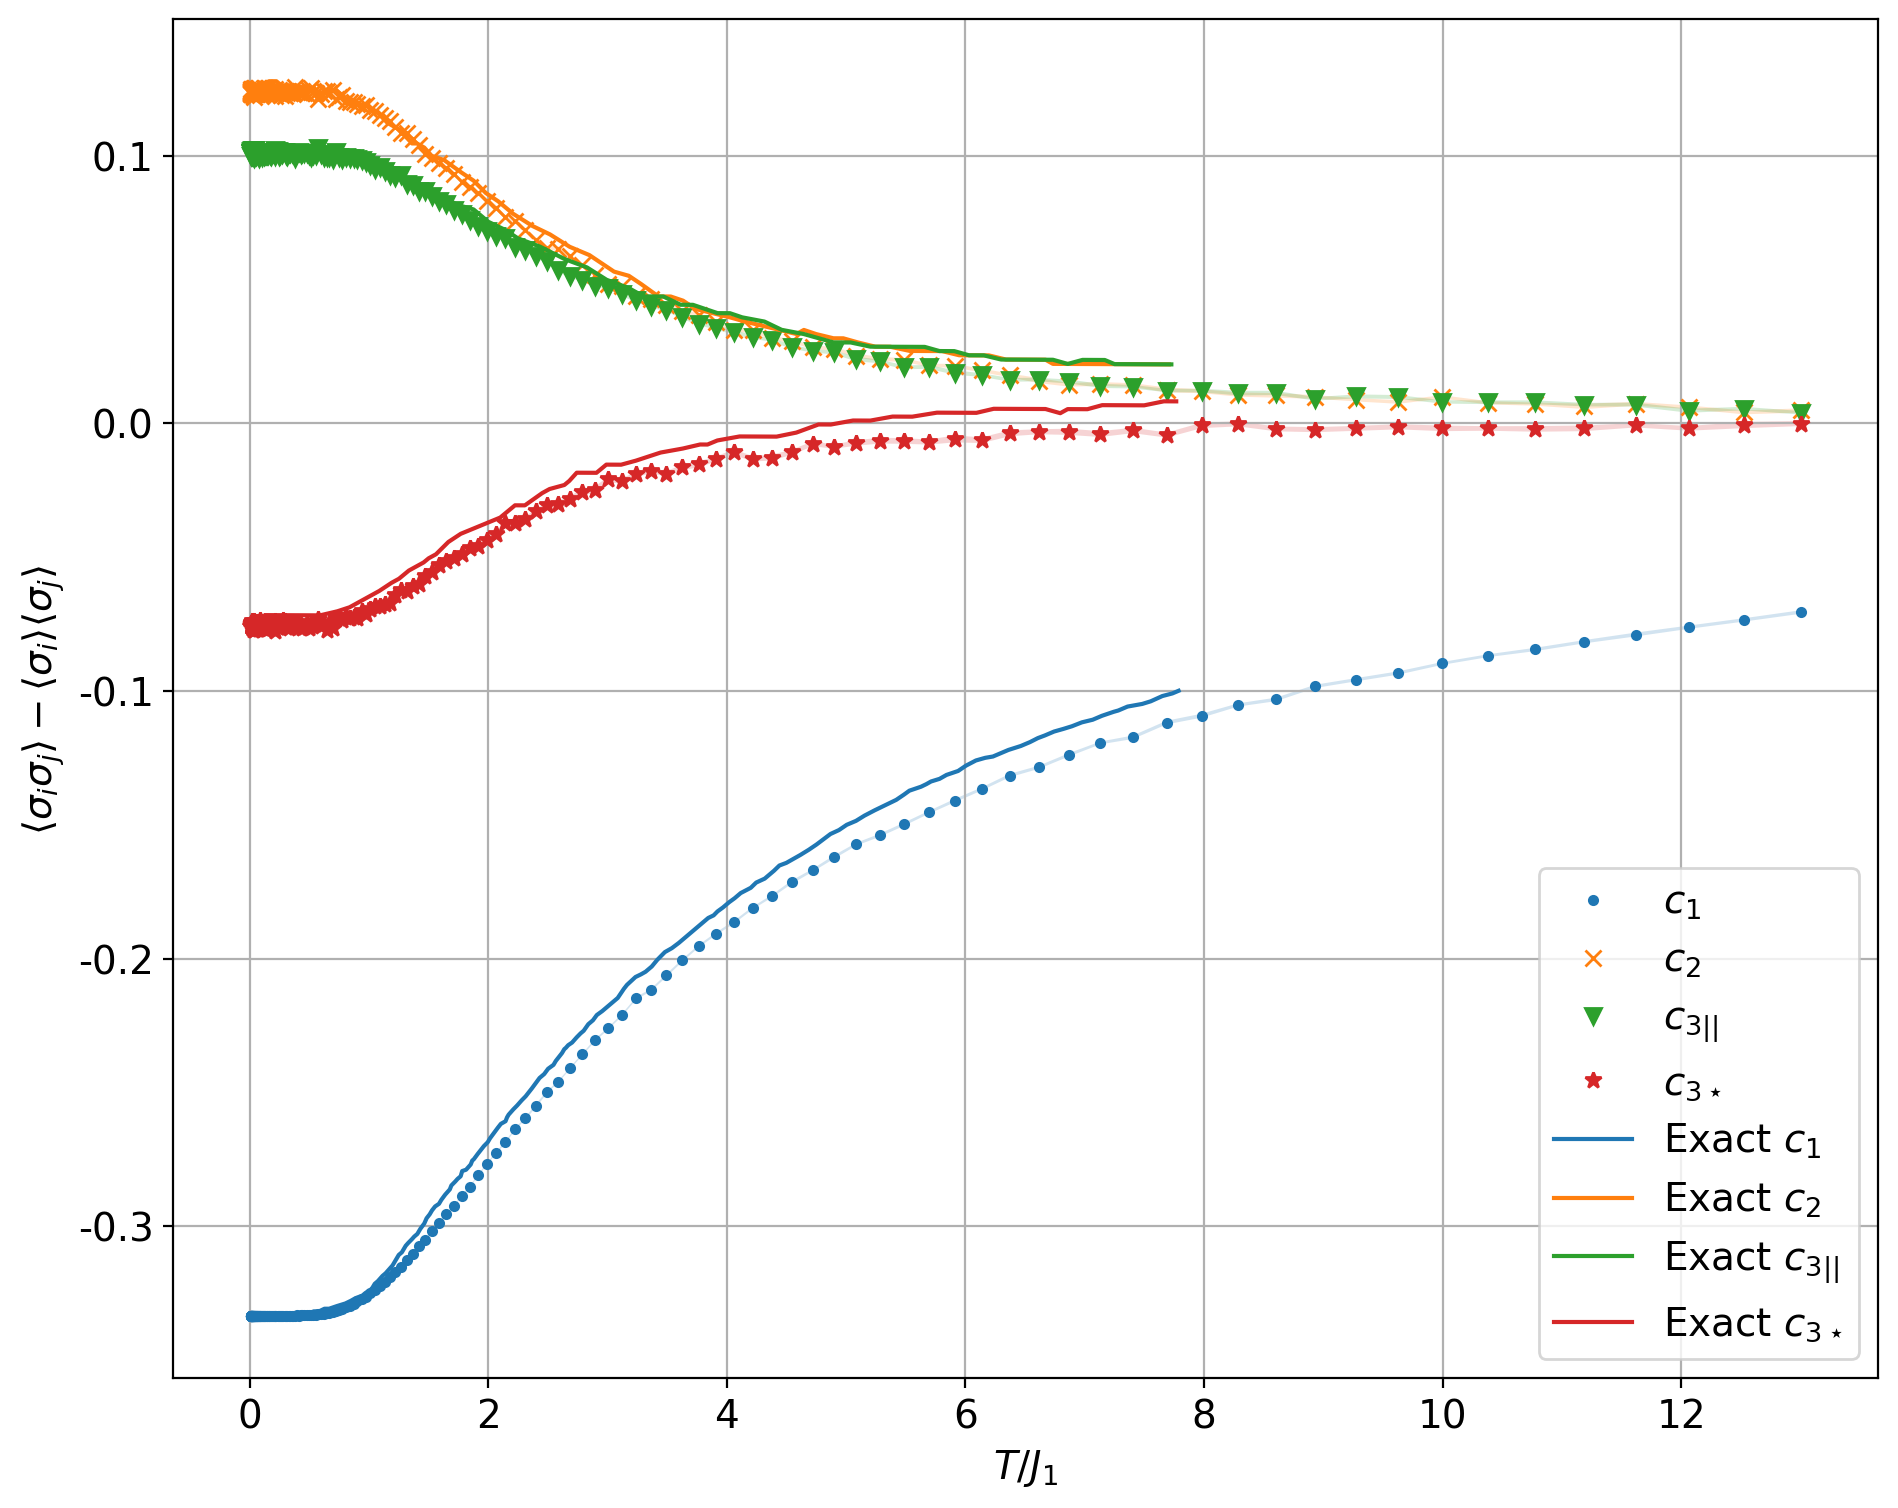

In [12]:
i = 0
af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                               t_h_varMeanFc, foldername, 
                               results_foldername, filenamelist,
                               tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                               addsave = "",
                               addtitle = "", log = False)
plt.gca().set_prop_cycle(None)
plt.plot(NNdata[:,0], NNdata[:,1], label = r'Exact $c_1$')
plt.plot(NN2data[:,0], NN2data[:,1], label = r'Exact $c_2$')
plt.plot(NN3pdata[:,0], NN3pdata[:,1], label = r'Exact $c_{3||}$')
plt.plot(NN3sdata[:,0], NN3sdata[:,1], label = r'Exact $c_{3\star}$')
plt.xlabel(r'$T/J_1$')
plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
plt.legend()